<a href="https://colab.research.google.com/github/techllen/Ames_Housing_Analytics/blob/main/ames_housing_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EDA

In [ ]:
#1.#It contains various features and attributes of residential homes in Ames, Iowa, USA.
#Here - https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
# feature documentation https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf
#My Goal is to determine different attributes of the house that Influence its price

In [ ]:
#2.Data Cleaning and Preprocessing:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1.Loading Datasets
# superstore_sales_data = pd.read_excel('/content/datasets/Superstore.xlsx')
ames_housing_data = pd.read_csv('/content/drive/MyDrive/AI_ML/datasets/AmesHousing.csv', encoding='ISO-8859-1') # or encoding='ISO-8859-1'
# ames_housing_data.head(4)

# 2. Stats about the data
#descriptive stats on the data
# ames_housing_data.describe()

# Structure of the dataset
# ames_housing_data.info()

#checking for missing values
missing_values_series = ames_housing_data.isnull().sum()

greater_than_zero_mask = missing_values_series > 0

filtered_missing_values_series = missing_values_series[ greater_than_zero_mask ]

# print(filtered_missing_values_series)

# 3. Data Cleaning
# 3.1 Handling missing value
# RULE OF THUMB
# if missing values count is > 70% of the data delete the attribute

# Checking 70% missing values
total_number_of_records = ames_housing_data.shape[0]

# Convert the series to a DataFrame and rename the columns
filtered_missing_values_df = filtered_missing_values_series.to_frame(name='number_of_missing_values')
filtered_missing_values_df.index.name = 'column_name'
filtered_missing_values_df = filtered_missing_values_df.reset_index()

filtered_missing_values_df['missing_values_percentage'] = (filtered_missing_values_df['number_of_missing_values'] / total_number_of_records) * 100

# filtered_missing_values_df

# Get the names of the columns to drop
dropping_off_condition = filtered_missing_values_df['missing_values_percentage'] > 70
filtered_missing_values_df_columns_to_drop = filtered_missing_values_df[dropping_off_condition]
# filtered_missing_values_df_columns_to_drop

columns_to_drop = filtered_missing_values_df_columns_to_drop['column_name'].tolist()

# Dropping off columns with missing values > 70%
ames_housing_data = ames_housing_data.drop(columns=columns_to_drop)
# ames_housing_data.info()

# Data imputation
categorical_columns = ames_housing_data.select_dtypes(include=['object']).columns
categorical_columns
int_columns = ames_housing_data.select_dtypes(include=['int64']).columns
float_columns = ames_housing_data.select_dtypes(include=['float64']).columns
numerical_columns = int_columns.append(float_columns)
# numerical_columns

replace_mean_lambda = lambda col_name: ames_housing_data[col_name].fillna(ames_housing_data[col_name].median(),inplace=True)
replace_mode_lambda = lambda col_name: ames_housing_data[col_name].fillna(ames_housing_data[col_name].mode()[0],inplace=True)

for col in numerical_columns:
  replace_mean_lambda(col)

for col in categorical_columns:
  replace_mode_lambda(col)

# print("-----------cleaned and imputated data--------------")
# ames_housing_data.info()

#3.2 Data type conversion
#Getting categorical calumns
# Get all columns of type 'object' (string)
object_columns = ames_housing_data.select_dtypes(include=['object']).columns
for col in object_columns:
    ames_housing_data[col]=ames_housing_data[col].astype('category')


#3.3 removing duplicates
duplicates = ames_housing_data.duplicated().sum()
if duplicates > 0:
    ames_housing_data = ames_housing_data.drop_duplicates()

#4.Outlier Detection

# Visualizing outliers in 'Price' before treatment
# plt.figure(figsize=(8, 4))
# sns.boxplot(x=ames_housing_data['SalePrice'])
# plt.title('Sale Price Outliers (Before Treatment)')
# plt.xlabel('SalePrice')
# plt.show()

# Identifying outliers using the IQR method

# Calculating IQR for 'Fare'
Q1 = ames_housing_data['SalePrice'].quantile(0.25)
Q3 = ames_housing_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

price_outliers = ames_housing_data[(ames_housing_data['SalePrice'] < lower_bound) | (ames_housing_data['SalePrice'] > upper_bound)]
# print(f"Number of fare outliers: {len(price_outliers)}")

# 4.1 Handling Outliers for sale price
# capping will be used - to avoid losing data
# Treating Year Built outliers by capping
ames_housing_data['SalePrice'] = ames_housing_data['SalePrice'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Visualizing outliers in 'Fare' after treatment
# plt.figure(figsize=(6, 3))
# sns.boxplot(x=ames_housing_data['SalePrice'])
# plt.title('SalePrice Outliers (After Treatment)')
# plt.xlabel('SalePrice')
# plt.show()

print("\n-----------data after type conversion and dealing with outliers--------------")
ames_housing_data.head(5)

# 5.Feature Engineering
# 6.1 Creating New Features

# Age_of_the_house = (Yr Sold  - Year Built )

ames_housing_data['Age_of_the_house'] = ames_housing_data['Yr Sold'] - ames_housing_data['Year Built']

ames_housing_data.head(5)

# 6.2 Converting Categorical Features to Numerical


-----------data after type conversion and dealing with outliers--------------


<ipython-input-44-0410999df231>:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  replace_mean_lambda = lambda col_name: ames_housing_data[col_name].fillna(ames_housing_data[col_name].median(),inplace=True)
<ipython-input-44-0410999df231>:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Age_of_the_house
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,5,2010,WD,Normal,215000.0,50
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,120,0,0,6,2010,WD,Normal,105000.0,49
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,12500,6,2010,WD,Normal,172000.0,52
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,4,2010,WD,Normal,244000.0,42
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,3,2010,WD,Normal,189900.0,13


In [ ]:
#observation
# ames_housing_data.info()
ames_housing_data['Yr Sold'].describe()

,Yr Sold
count,2930.000000
mean,2007.790444
std,1.316613
min,2006.000000
25%,2007.000000
50%,2008.000000
75%,2009.000000
max,2010.000000


In [ ]:
# ML

In [ ]:
#My Goal is to determine different attributes of the house that Influence its price

#From EDA these are the factors that I have determined to influence the price of the house

# feature documentation https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf

attributes_for_linear_regression = [ # higly correlated 0.5
    "Total Bsmt SF", # Total square feet of basement area
    "Fireplaces",  # Number of fireplaces
    # "Garage Cars",  # Size of garage in car capacity
    "Garage Area",  # Size of garage in square feet
    "TotRms AbvGrd",  # Total rooms above ground (excluding bathrooms)
    "Gr Liv Area",  # Above ground living area square footage
    "1st Flr SF",  # First floor square footage
    "Age_of_the_house", #Age of the house since the year it was built
    "Year Remod/Add",  # Year of remodel (if any)
    "Overall Qual",  # Overall material and finish quality
    "Mas Vnr Area",  # Masonry veneer area in square feet
    "Year Built",  # Age of the house
    "Full Bath",  # Number of full bathrooms
    "SalePrice"  # Defines amount paid for the house
]

In [ ]:
#Problem Statement

#Develop a machine learning model to predict the sale price of a residential
# property in Ames, Iowa. The model should leverage key housing characteristics,
# such as living area, basement size, garage size, overall quality, number of
# fireplaces and bathrooms, and age, to accurately estimate the sale price.

In [ ]:
# 1.
# 1.1 Separate the dataset into features & target variable
ames_housing_data_for_regression_testing = ames_housing_data[attributes_for_linear_regression]

ames_housing_data_for_regression_testing

,Total Bsmt SF,Fireplaces,Garage Area,TotRms AbvGrd,Gr Liv Area,1st Flr SF,Age_of_the_house,Year Remod/Add,Overall Qual,Mas Vnr Area,Year Built,Full Bath,SalePrice
0,1080.0,2,528.0,7,1656,1656,50,1960,6,112.0,1960,1,215000.0
1,882.0,0,730.0,5,896,896,49,1961,5,0.0,1961,1,105000.0
2,1329.0,0,312.0,6,1329,1329,52,1958,6,108.0,1958,1,172000.0
3,2110.0,2,522.0,8,2110,2110,42,1968,7,0.0,1968,2,244000.0
4,928.0,1,482.0,6,1629,928,13,1998,5,0.0,1997,2,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1003.0,0,588.0,6,1003,1003,22,1984,6,0.0,1984,1,142500.0
2926,864.0,0,484.0,5,902,902,23,1983,5,0.0,1983,1,131000.0
2927,912.0,0,0.0,6,970,970,14,1992,5,0.0,1992,1,132000.0
2928,1389.0,1,418.0,6,1389,1389,32,1975,5,0.0,1974,1,170000.0


In [ ]:
# Display the column names to verify the structure of the dataset
print("Column names in the dataset:", ames_housing_data_for_regression_testing.columns)

Column names in the dataset: Index(['Total Bsmt SF', 'Fireplaces', 'Garage Area', 'TotRms AbvGrd',
       'Gr Liv Area', '1st Flr SF', 'Age_of_the_house', 'Year Remod/Add',
       'Overall Qual', 'Mas Vnr Area', 'Year Built', 'Full Bath', 'SalePrice'],
      dtype='object')


In [ ]:
ames_housing_data_for_regression_testing.info()
#all values are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total Bsmt SF     2930 non-null   float64
 1   Fireplaces        2930 non-null   int64  
 2   Garage Area       2930 non-null   float64
 3   TotRms AbvGrd     2930 non-null   int64  
 4   Gr Liv Area       2930 non-null   int64  
 5   1st Flr SF        2930 non-null   int64  
 6   Age_of_the_house  2930 non-null   int64  
 7   Year Remod/Add    2930 non-null   int64  
 8   Overall Qual      2930 non-null   int64  
 9   Mas Vnr Area      2930 non-null   float64
 10  Year Built        2930 non-null   int64  
 11  Full Bath         2930 non-null   int64  
 12  SalePrice         2930 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 297.7 KB


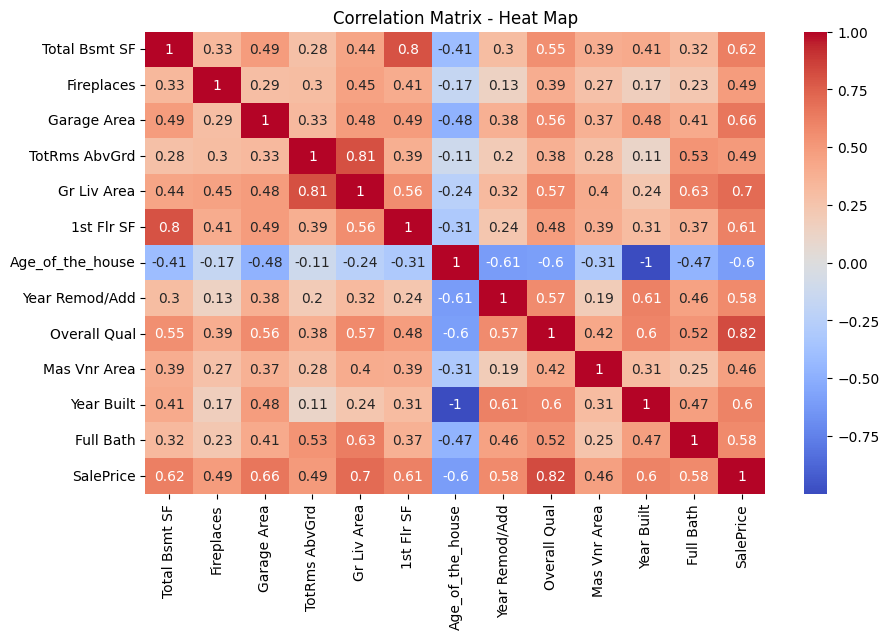

In [ ]:
# Let's find out whether the variables(numerical columns) are correlated with the target variable - SalePrice

# Correlation matrix - Heat Map
plt.figure(figsize=(10, 6))

# Select only numerical columns for correlation matrix
numerical_cols = ames_housing_data_for_regression_testing.select_dtypes(include=[np.number])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Heat Map')
plt.show()

In [ ]:
# Observation from correlation above

In [ ]:
# selecting features
features = ['Total Bsmt SF', 'Fireplaces', 'Garage Area', 'TotRms AbvGrd',
       'Gr Liv Area', '1st Flr SF', 'Age_of_the_house', 'Year Remod/Add',
       'Overall Qual', 'Mas Vnr Area', 'Year Built', 'Full Bath']
# Split the data into features (X) and target (y)
X = ames_housing_data_for_regression_testing[features]
#y = df['Fare_Per_Person']
y=ames_housing_data_for_regression_testing['SalePrice']
X.head()

,Total Bsmt SF,Fireplaces,Garage Area,TotRms AbvGrd,Gr Liv Area,1st Flr SF,Age_of_the_house,Year Remod/Add,Overall Qual,Mas Vnr Area,Year Built,Full Bath
0,1080.0,2,528.0,7,1656,1656,50,1960,6,112.0,1960,1
1,882.0,0,730.0,5,896,896,49,1961,5,0.0,1961,1
2,1329.0,0,312.0,6,1329,1329,52,1958,6,108.0,1958,1
3,2110.0,2,522.0,8,2110,2110,42,1968,7,0.0,1968,2
4,928.0,1,482.0,6,1629,928,13,1998,5,0.0,1997,2


In [ ]:
# 1.2 Standardize the features
# Import the necessary class
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 0.06449187,  2.16218005,  0.25667302, ...,  0.06104605,
        -0.37553701, -1.02479289],
       [-0.38503191, -0.92514332,  1.19632511, ..., -0.56603937,
        -0.34246845, -1.02479289],
       [ 0.62980208, -0.92514332, -0.74810347, ...,  0.03865014,
        -0.44167415, -1.02479289],
       ...,
       [-0.31692225, -0.92514332, -2.1994473 , ..., -0.56603937,
         0.68265709, -1.02479289],
       [ 0.76602141,  0.61851837, -0.25501871, ..., -0.56603937,
         0.0874229 , -1.02479289],
       [-0.12621519,  0.61851837,  0.82418567, ..., -0.03973554,
         0.71572565,  0.7840283 ]])

In [ ]:
# 1.3 Split into training & testing data
# Import the necessary class
from sklearn.model_selection import train_test_split

# Split into training and testing sets 80% to train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the first few rows of the prepared data
print("Training features:\n", X_train[:5])
print("Training target:\n", y_train[:5])
print("Testing features:\n", X_test[:5])
print("Testing target:\n", y_test[:5])


Training features:
 [[ 8.71950916e-02  6.18518367e-01  2.87376111e-02 -2.81684081e-01
  -2.56598022e-01  5.37083789e-01 -1.13389302e-01 -3.96349503e-01
   6.41571379e-01  4.92167269e-01  1.53560035e-01  7.84028295e-01]
 [-8.76197116e-02 -9.25143316e-01  3.03190449e-01  3.54166733e-01
   1.23917992e+00  1.12887627e-03  1.83775863e-01 -8.27864981e-01
  -7.76078803e-01 -5.66039368e-01 -1.44057055e-01  7.84028295e-01]
 [-2.38745602e+00 -9.25143316e-01 -5.03420203e-02 -2.81684081e-01
  -5.45465191e-01  1.64467516e-01  2.82830919e-01 -1.06759580e+00
  -1.48490389e+00 -5.66039368e-01 -3.09399883e-01  7.84028295e-01]
 [-2.38745602e+00 -9.25143316e-01 -2.45715227e-01 -2.81684081e-01
  -9.09516965e-01 -3.05131074e-01  7.78106194e-01 -1.64294977e+00
  -1.48490389e+00 -5.66039368e-01 -7.39291236e-01  7.84028295e-01]
 [-1.02526275e+00 -9.25143316e-01 -2.19944730e+00  9.90017548e-01
   3.98299463e-01 -1.49448933e-01  1.73563839e+00 -1.64294977e+00
  -1.48490389e+00 -5.66039368e-01 -1.69827964e+00  7

In [ ]:
#2 Model Implementation

# 2.1 Model Fitting
# Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

y_pred

array([189448.33540151, 129701.29672171, 221706.67939099, 108532.64868134,
       123974.61500719, 184474.52588662, 192081.63277683, 168149.76352826,
        86142.57634697, 280352.78159981, 229386.05844392, 228644.93174484,
        98637.78430634, 164383.55743584,  93902.29119258, 168768.65883914,
       160890.43632653, 201208.68013018, 133125.74141879, 138706.81934273,
       206846.14302128, 138303.24201102, 199317.35395687, 220137.71631308,
       208765.29355287, 270260.3221444 , 308773.97399199, 224829.12371886,
       210427.96821725, 212695.61855517, 200276.86197176,  67622.83765407,
       229890.25278367,  95637.01680602, 147391.53939396, 101822.84924677,
       199542.32246988, 265100.67396059, 200259.59753341, 219932.03493815,
       294488.08086721, 186410.19240878, 227654.54795158, 207356.43197517,
       105660.59856081, 281024.96025588, 177352.37743841, 155393.82199985,
       161238.495743  , 133142.60689747, 196672.94229229, 126292.9017911 ,
       146562.16626724, 1

In [ ]:
# 2.2 Model Evaluation
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 19411.9063145009
Mean Squared Error (MSE): 718289661.7413654
R-squared (R2): 0.8652139941163776


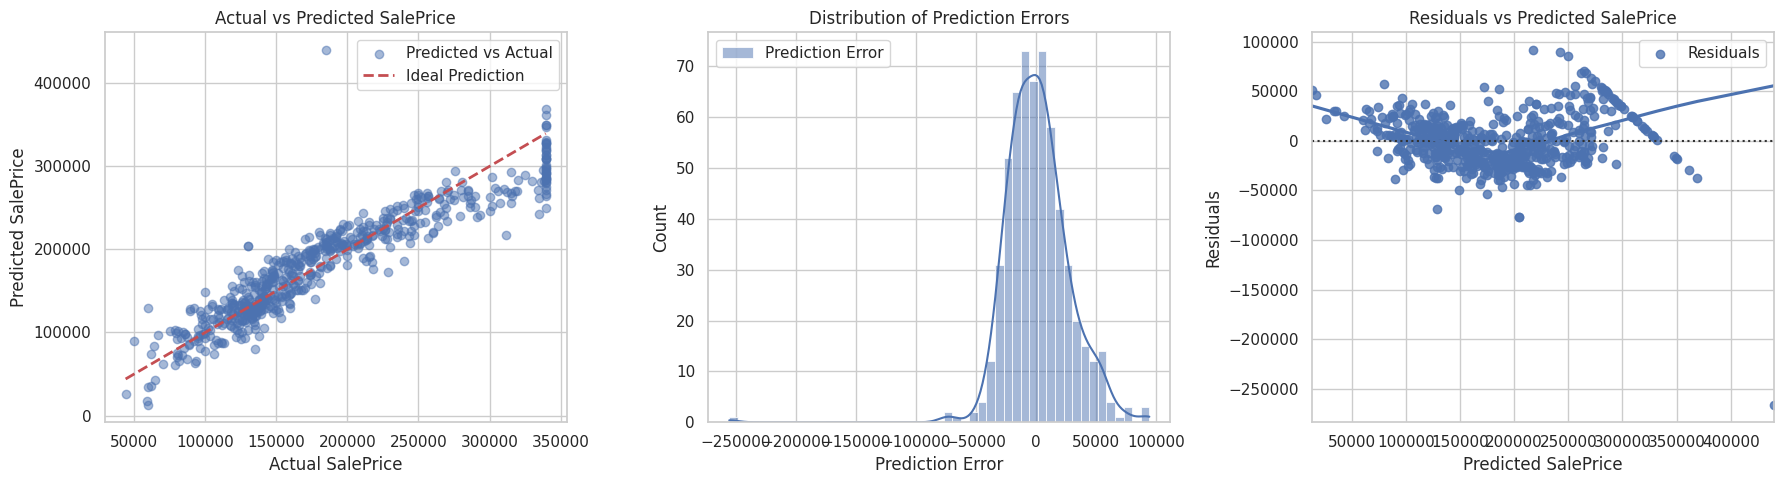

In [ ]:
# 2.3 Visualization of Regression Predictions

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot of actual vs predicted fares
axes[0].scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Prediction')
axes[0].set_xlabel('Actual SalePrice')
axes[0].set_ylabel('Predicted SalePrice')
axes[0].set_title('Actual vs Predicted SalePrice')
axes[0].legend()

# Distribution plot of prediction errors
errors = y_test - y_pred
sns.histplot(errors, kde=True, ax=axes[1], label='Prediction Error')
axes[1].set_xlabel('Prediction Error')
axes[1].set_title('Distribution of Prediction Errors')
axes[1].legend()

# Residual plot
sns.residplot(x=y_pred, y=errors, lowess=True, ax=axes[2], label='Residuals')
axes[2].set_xlabel('Predicted SalePrice')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals vs Predicted SalePrice')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()
